In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import sympy as sp
from sympy import *
from sympy import symbols, solve
from sympy import symbols, Eq, Function
from sympy.solvers.ode.systems import dsolve_system

In [2]:
a, b, v, m, theta, T, t, p, h, s, K = symbols('a b v m theta T t P h s K')

ODEs

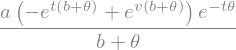

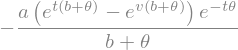

In [3]:
I1_t = (a*exp(-t*theta)*(exp(v*(b+theta))-exp(t*(b+theta))))/(b+theta)
simI1_t = simplify(I1_t)
display(I1_t)
display(simI1_t)

In [4]:
I2_t = a*(v-t)
display(I2_t)

- Ordering cost

In [5]:
RC = K

- Holding cost

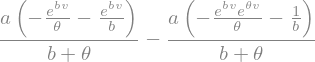

In [6]:
#intI1 = integrate(I1_t, (t,0,v))
#display(intI1)
#print(intI1)
intI1 = a*(-exp(b*v)/theta - exp(b*v)/b)/(b + theta) - a*(-exp(b*v)*exp(theta*v)/theta - 1/b)/(b + theta)
display(intI1)

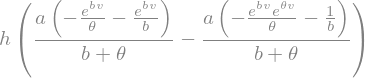

In [7]:
HC = h*intI1
display(HC)

- shortage cost

-T**2*a/2 + T*a*v - a*v**2/2


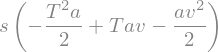

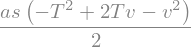

In [8]:
intI2 = integrate(I2_t, (t,v,T))
print(intI2)
SC = s*intI2
display(SC)
simsc = simplify(SC)
display(simsc)

- Deterioration cost

Piecewise((a*exp(b*v)/b - a/b, (b > -oo) & (b < oo) & Ne(b, 0)), (a*v, True))


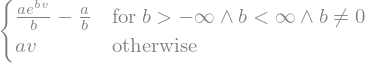

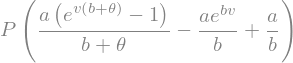

In [9]:
demandof0tov = integrate(a*exp(b*t), (t,0,v))
print(demandof0tov)
display(demandof0tov)
noofdeter =a/(b+theta)*(exp((b+theta)*v)-1) -(a*exp(b*v)/b - a/b)
DC = noofdeter*p
display(DC)

Total cost

(K + P*(a*(exp(v*(b + theta)) - 1)/(b + theta) - a*exp(b*v)/b + a/b) + h*(a*(-exp(b*v)/theta - exp(b*v)/b)/(b + theta) - a*(-exp(b*v)*exp(theta*v)/theta - 1/b)/(b + theta)) + s*(-T**2*a/2 + T*a*v - a*v**2/2))/T


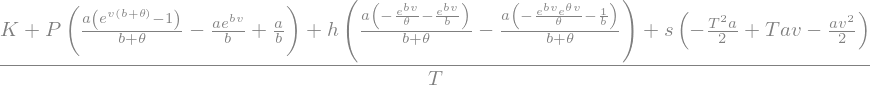

In [10]:
TC = 1/T*(HC + SC + DC + RC)
print(TC)
display(TC)

- The truncated Taylor's series

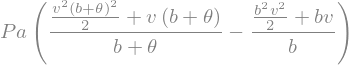

In [11]:
deterioration = p*a*(1/(b+theta)*((b+theta)*v+((b+theta)*v)**2/2)-1/b*(b*v+(b*v)**2/2))
display(deterioration)

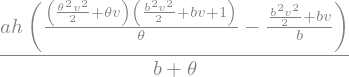

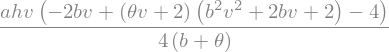

In [12]:
holding = (h*a)/(b+theta)*((1+b*v+(b*v)**2/2)*(theta*v+(theta*v)**2/2)/theta - (b*v+(b*v)**2/2)/b)
display(holding)
simh = simplify(holding)
display(simh)
#y = simplify(b*v*(2*b*v-1)+theta*v*(b**2*v**2+2*b*v+2))
#display(y)
#m = simplify((2*b*v-1)*(b**2*v**2+2*b*v+2))
#display(m)

- Total cost final

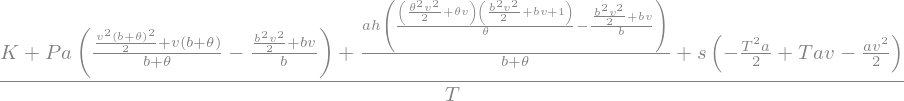

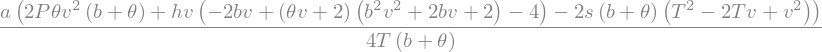

In [13]:
TC1 = 1/T*(RC + SC + deterioration + holding)
display(TC1)
x = 1/T*(SC+deterioration+holding)
simx = simplify(x)
display(simx)

- Diff Total cost

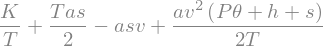

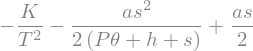

-K/T**2 - a*s**2/(2*(P*theta + h + s)) + a*s/2


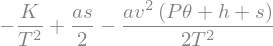

In [14]:
simTC = a*v**2*(h+theta*p+s)/(2*T) + (s*a*T)/2 - s*a*v + K/T
display(simTC)
#หา v ออกมา แทนค่ากลับ
m = s/(p*theta+h+s)
diffTCT = diff(a*(m*T)**2*(h+theta*p+s)/(2*T) + (s*a*T)/2 - s*a*(m*T) + K/T, T)
display(diffTCT)
print(diffTCT)
diffTC1T = diff(simTC,T)
display(diffTC1T)

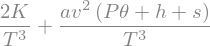

In [15]:
diffTCT2 = diff(diffTC1T,T)
display(diffTCT2)

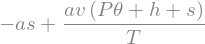

-a*s + a*v*(P*theta + h + s)/T


In [16]:
diffTCv = diff(simTC, v)
display(diffTCv)
print(diffTCv)

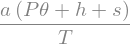

In [17]:
diffTCv2 = diff(diffTCv,v)
display(diffTCv2)

- diff v and then diff T

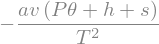

In [18]:
diffTCvT = diff(diffTC1T, v)
display(diffTCvT)

- Multiple diff

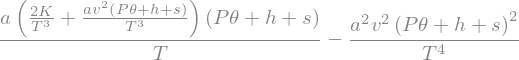

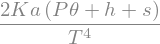

In [19]:
x = diffTCT2*diffTCv2-diffTCvT**2
display(x)
simx = simplify(x)
display(simx)

- solve for T and v

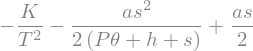

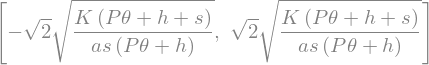

[-sqrt(2)*sqrt(K*(P*theta + h + s)/(a*s*(P*theta + h))), sqrt(2)*sqrt(K*(P*theta + h + s)/(a*s*(P*theta + h)))]


In [20]:
#เอาสมการที่แทน v จากที่ solve ได้มาคิดหา T
display(diffTCT)
solT = solve(diffTCT, T)
display(solT)
print(solT)


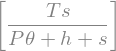

In [21]:
solv = solve(diffTCv, v)
display(solv)

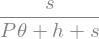

In [22]:
dTbydv1 = idiff((h+theta*p+s)*v-s*T, v, T)
display(dTbydv1)

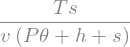

In [23]:
dTbydv =idiff(a*(h+theta*p+s)*v**2-a*s*T**2+2*K, v, T)
display(dTbydv)

- Multiply

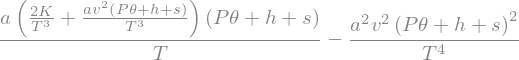

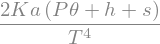

In [25]:
x = (diffTCv2*diffTCT2)-(diffTCvT)**2
display(x)
simx = simplify(x)
display(simx)